Loading some data:

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()
features = iris.data
labels = iris.target

# Cross validation

A simple train/test split:

In [60]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.4, random_state=0)

Cross validation is used to test the model (get average score) and to fine-tune it.

In [61]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)
scores.mean()

0.98000000000000009

cv=5 defines that we use 5-fold cross validation. [Other options like stratified k-fold are available]("http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators")

#Fine tune model parameters

In [70]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validation.cross_val_score(knn, features, labels, cv=10, scoring='precision_weighted')
    k_scores.append(scores.mean())
print k_scores

[0.96603174603174613, 0.96047619047619048, 0.9738095238095239, 0.9738095238095239, 0.9738095238095239, 0.9738095238095239, 0.9738095238095239, 0.96999999999999997, 0.97777777777777786, 0.96999999999999997, 0.96999999999999997, 0.97777777777777786, 0.98333333333333339, 0.97555555555555562, 0.97777777777777786, 0.97777777777777786, 0.97777777777777786, 0.98333333333333339, 0.97777777777777786, 0.98333333333333339, 0.97222222222222232, 0.97222222222222232, 0.97777777777777786, 0.96444444444444455, 0.97222222222222232, 0.96444444444444455, 0.97000000000000008, 0.9588888888888889, 0.9588888888888889, 0.9588888888888889]


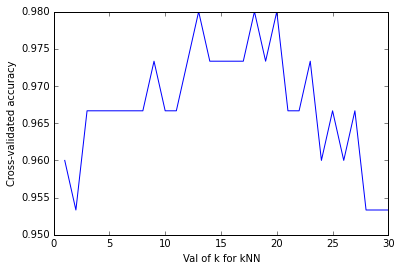

In [63]:
plt.plot(k_range, k_scores)
plt.xlabel('k')
plt.ylabel('score')

# Recursive feature selection

One way would be to [minimize mean(SQRT(score))](https://www.youtube.com/watch?v=6dbrR-WymjI).

Feature selection for decision trees or tree ensembles is redundand. But "regularized tree" can be employed.

#K-fold cross-validation behind the scene
([Good explanation](https://www.youtube.com/watch?v=6dbrR-WymjI))
1. Split dataset into K equal partitions ("folds")
2. Use fold 1 as testing set and the union of the other folds as training set
3. Calculate testing accuracy
4. Repeat steps 2 and 3 K times, using a different fold as testing set each time
5. Use average testing accuracy as the estimate of out-of-sample accuracy

In [32]:
from sklearn.cross_validation import KFold
kf = KFold(25, 5)

for iteration, data in enumerate(kf, start=1):
    print '{} {} {}'.format(iteration, data[0], data[1])

1 [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
2 [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
3 [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]
